In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix , root_mean_squared_error, mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action="ignore")


In [38]:
df=pd.read_csv("../data/new_data.csv")

In [39]:
df_bin = df.copy()
df_bin['target_bin'] = (df_bin['num'] != 0).astype(int)  # 0 -> 0, else -> 1

X = df_bin.drop(columns=['num','target_bin'], axis=1)
y = df_bin['target_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [40]:

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train)
# Train report
y_train_pred = model.predict(X_train)
print("Train Report:")
print(classification_report(y_train, y_train_pred))




# Test report
y_test_pred = model.predict(X_test)
print("Test Report:")
print(classification_report(y_test, y_test_pred))

Train Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       329
           1       0.84      0.83      0.83       407

    accuracy                           0.82       736
   macro avg       0.81      0.82      0.81       736
weighted avg       0.82      0.82      0.82       736

Test Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        82
           1       0.85      0.83      0.84       102

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184



Text(0.5, 1.0, 'Confusion Matrix')

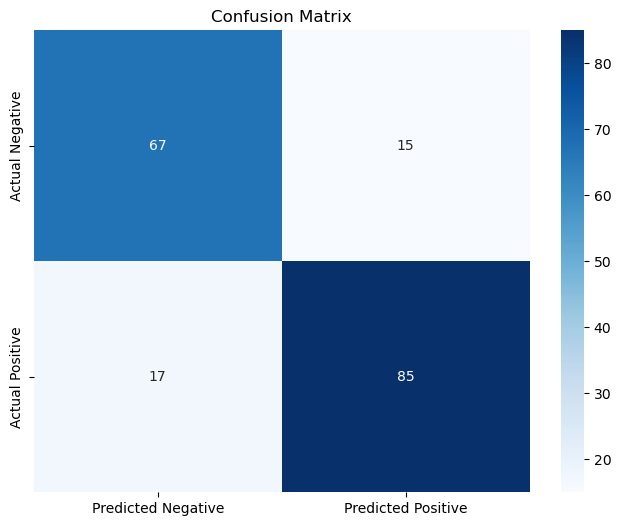

In [41]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred),
                                   columns=['Predicted Negative', 'Predicted Positive'],
                                      index=['Actual Negative', 'Actual Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

AUC Score: 0.89


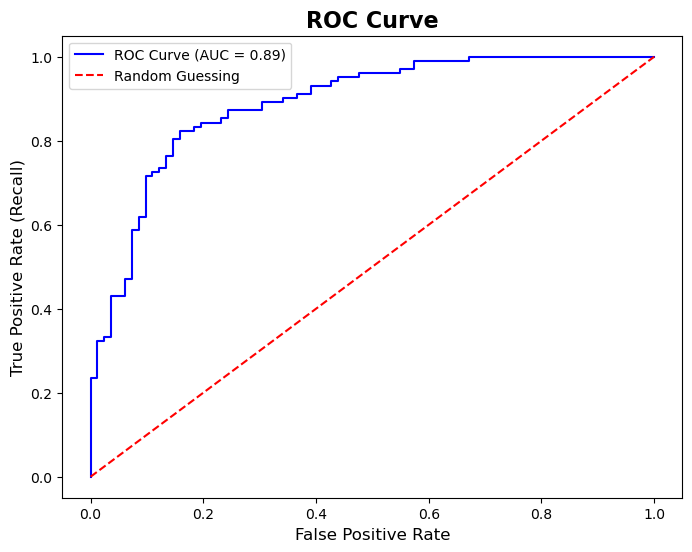

In [42]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, roc_auc_score

# 1. توقع القيم الاحتمالية (مش القيم النهائية 0 أو 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # احتمالية انه يكون 1

# 2. احسب الـ FPR و TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. احسب الـ AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"AUC Score: {auc_score:.2f}")

# 4. اعمل رسم للـ ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('ROC Curve', fontsize=16, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.legend()
plt.show()


In [43]:
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 
                 'solver': ['liblinear', 'lbfgs']}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), 
                       param_grid_lr, cv=5, scoring='f1_macro')
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression params:", grid_lr.best_params_)
print("Best Logistic Regression CV Score:", grid_lr.best_score_)

y_pred_lr = grid_lr.predict(X_test)
print("\n=== Logistic Regression ===")
print("Train Report:\n", classification_report(y_train, grid_lr.predict(X_train)))
print("Test Report:\n", classification_report(y_test, y_pred_lr))


Best Logistic Regression params: {'C': 0.01, 'solver': 'lbfgs'}
Best Logistic Regression CV Score: 0.8197763411298002

=== Logistic Regression ===
Train Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       329
           1       0.84      0.85      0.85       407

    accuracy                           0.83       736
   macro avg       0.83      0.83      0.83       736
weighted avg       0.83      0.83      0.83       736

Test Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        82
           1       0.84      0.85      0.84       102

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



### Decision Tree 


In [58]:
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Train report
y_train_pred = model.predict(X_train)
print("Train Report:")
print(classification_report(y_train, y_train_pred))




# Test report
y_test_pred = model.predict(X_test)
print("Test Report:")
print(classification_report(y_test, y_test_pred))

Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       407

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
weighted avg       1.00      1.00      1.00       736

Test Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74        82
           1       0.78      0.85      0.81       102

    accuracy                           0.78       184
   macro avg       0.78      0.77      0.78       184
weighted avg       0.78      0.78      0.78       184



In [59]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='f1_macro'
)

grid_dt.fit(X_train, y_train)

print("Best Decision Tree params:", grid_dt.best_params_)
print("Best Decision Tree CV Score:", grid_dt.best_score_)

# --- Train Report ---
print("\n=== Decision Tree (Best Model) ===")
print("Train Report:\n", classification_report(y_train, grid_dt.predict(X_train)))

# --- Test Report ---
print("Test Report:\n", classification_report(y_test, grid_dt.predict(X_test)))

Best Decision Tree params: {'criterion': 'entropy', 'max_depth': 5}
Best Decision Tree CV Score: 0.7865332079262264

=== Decision Tree (Best Model) ===
Train Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       329
           1       0.86      0.88      0.87       407

    accuracy                           0.85       736
   macro avg       0.85      0.85      0.85       736
weighted avg       0.85      0.85      0.85       736

Test Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.75        82
           1       0.79      0.81      0.80       102

    accuracy                           0.78       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184



Text(0.5, 1.0, 'Confusion Matrix')

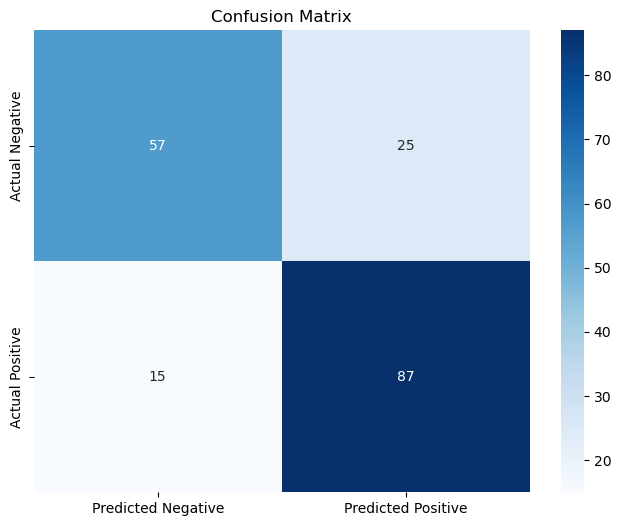

In [60]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred),
                                   columns=['Predicted Negative', 'Predicted Positive'],
                                      index=['Actual Negative', 'Actual Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

AUC Score: 0.84


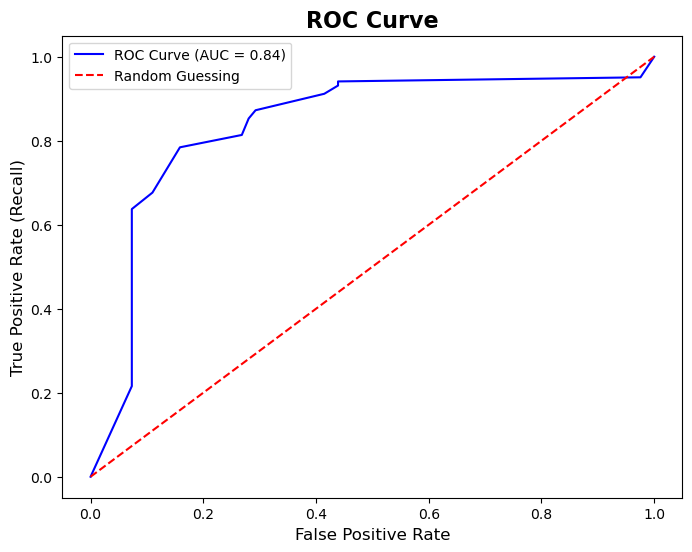

In [62]:
# 1. توقع القيم الاحتمالية (مش القيم النهائية 0 أو 1)
y_pred_proba = grid_dt.predict_proba(X_test)[:, 1]  # احتمالية انه يكون 1

# 2. احسب الـ FPR و TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. احسب الـ AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"AUC Score: {auc_score:.2f}")

# 4. اعمل رسم للـ ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('ROC Curve', fontsize=16, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.legend()
plt.show()

### Random Forest 


In [63]:
# Instantiate the Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=10,  # Number of decision trees to use
                                    criterion='entropy',  # Measure the quality of splits using Information Gain
                                    random_state=0)  # For reproducibility

# Fit the model to the training data
classifier.fit(X_train, y_train)
# Train report
y_train_pred = classifier.predict(X_train)
print("Train Report:")
print(classification_report(y_train, y_train_pred))




# Test report
y_test_pred = classifier.predict(X_test)
print("Test Report:")
print(classification_report(y_test, y_test_pred))

Train Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       329
           1       0.99      0.98      0.99       407

    accuracy                           0.99       736
   macro avg       0.99      0.99      0.99       736
weighted avg       0.99      0.99      0.99       736

Test Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        82
           1       0.84      0.83      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



Text(0.5, 1.0, 'Confusion Matrix')

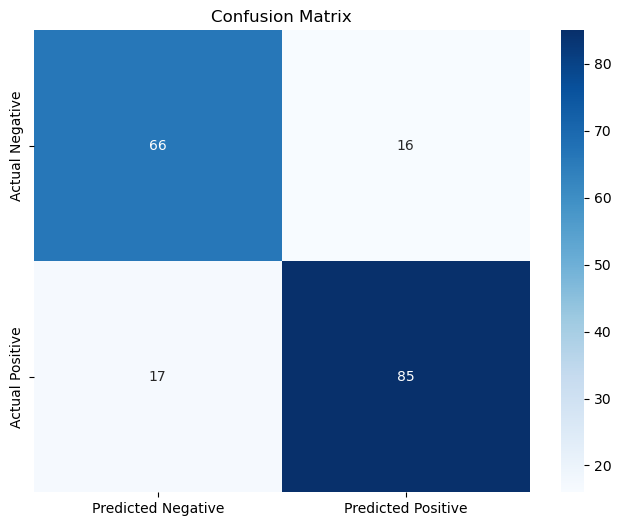

In [64]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred),
                                   columns=['Predicted Negative', 'Predicted Positive'],
                                      index=['Actual Negative', 'Actual Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

AUC Score: 0.89


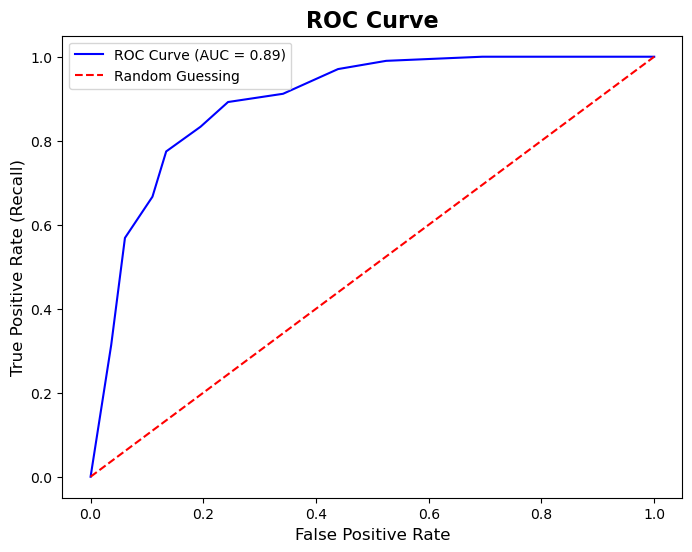

In [65]:
# 1. توقع القيم الاحتمالية (مش القيم النهائية 0 أو 1)
y_pred_proba = classifier.predict_proba(X_test)[:, 1]  # احتمالية انه يكون 1

# 2. احسب الـ FPR و TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. احسب الـ AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"AUC Score: {auc_score:.2f}")

# 4. اعمل رسم للـ ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('ROC Curve', fontsize=16, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.legend()
plt.show()

### Support Vector Machine (SVM) 


In [75]:
# Initialize SVM classifier with default parameters
svc = SVC(probability=True,kernel='rbf')

# Train the model on training data
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc.predict(X_test)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy score with default hyperparameters: {accuracy:.4f}')

Model accuracy score with default hyperparameters: 0.8207


In [76]:
# Train report
y_train_pred = svc.predict(X_train)
print("Train Report:")
print(classification_report(y_train, y_train_pred))




# Test report
y_test_pred = svc.predict(X_test)
print("Test Report:")
print(classification_report(y_test, y_test_pred))

Train Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       329
           1       0.87      0.91      0.89       407

    accuracy                           0.88       736
   macro avg       0.88      0.87      0.87       736
weighted avg       0.88      0.88      0.88       736

Test Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        82
           1       0.83      0.85      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



Text(0.5, 1.0, 'Confusion Matrix')

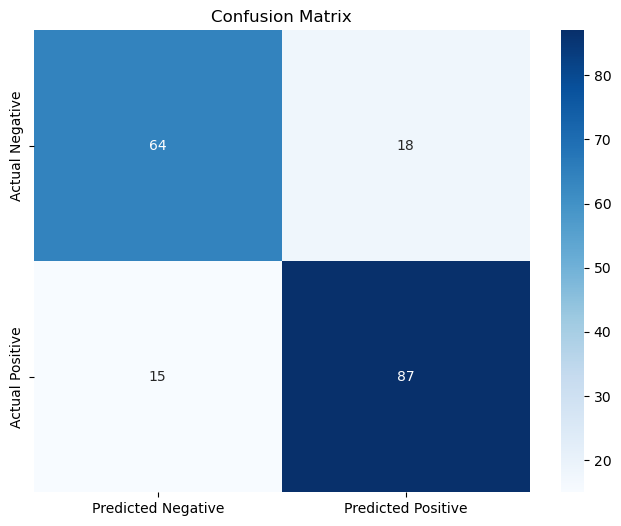

In [77]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred),
                                   columns=['Predicted Negative', 'Predicted Positive'],
                                      index=['Actual Negative', 'Actual Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

AUC Score: 0.90


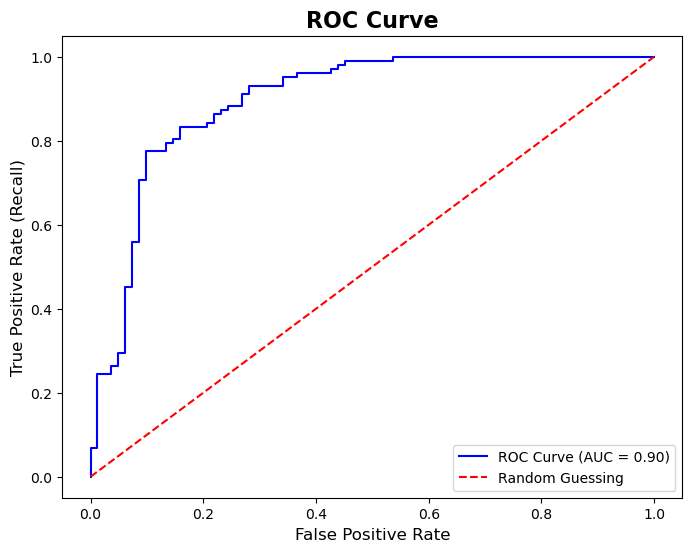

In [78]:
# 1. توقع القيم الاحتمالية (مش القيم النهائية 0 أو 1)
y_pred_proba = svc.predict_proba(X_test)[:, 1]  # احتمالية انه يكون 1

# 2. احسب الـ FPR و TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. احسب الـ AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"AUC Score: {auc_score:.2f}")

# 4. اعمل رسم للـ ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('ROC Curve', fontsize=16, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.legend()
plt.show()

### XGBOOST CLASSIFIER

In [85]:
xgb_model = XGBClassifier(n_estimators=100)

xgb_model.fit(
    X_train, y_train
    
)
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

print("Train Report:")
print(classification_report(y_train, y_train_pred))


print("Test Report:")
print(classification_report(y_test, y_test_pred))

Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       407

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
weighted avg       1.00      1.00      1.00       736

Test Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        82
           1       0.86      0.89      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



Text(0.5, 1.0, 'Confusion Matrix')

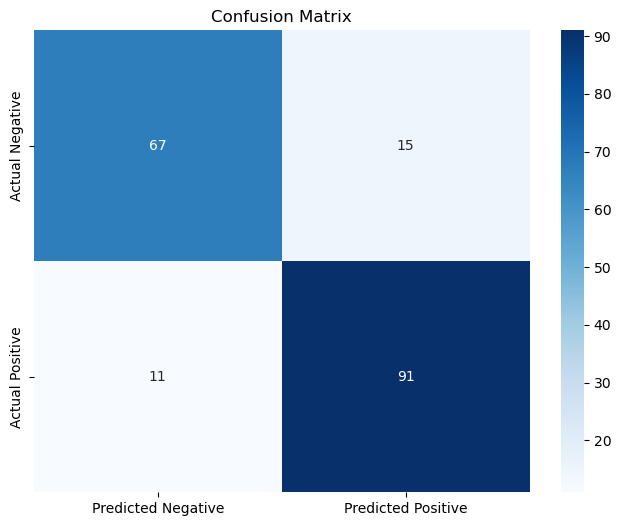

In [86]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred),
                                   columns=['Predicted Negative', 'Predicted Positive'],
                                      index=['Actual Negative', 'Actual Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

AUC Score: 0.90


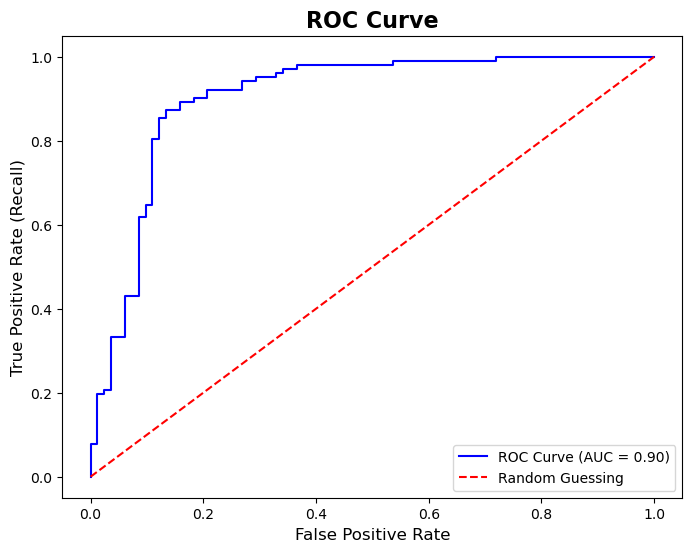

In [87]:
# 1. توقع القيم الاحتمالية (مش القيم النهائية 0 أو 1)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # احتمالية انه يكون 1

# 2. احسب الـ FPR و TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. احسب الـ AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"AUC Score: {auc_score:.2f}")

# 4. اعمل رسم للـ ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('ROC Curve', fontsize=16, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.legend()
plt.show()